## Supplement 4: Classification

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 4.3 Programming Task: Song popularity prediction using Logistic regression
The datasets __train-songs.csv__ and __test-songs.csv__ contain audio properties of various tracks collected from the music streaming site Spotify.


The goal of the task is to train a logistic regression classifier that predicts if
a given track is popular or not.
The dataset consists of 9 columns.
The first 8 columns contain various audio properties
which are provided as input features to the model.
The last column contains the class labels given by 0(not popular) and 1(popular).

i\. Implement the loss function and its gradient for the logistic regression model.
 

In [2]:
def normalize_data(X):
    mean_X=X.mean(axis=0)
    std_X=X.std(axis=0)
    return (X-mean_X)/std_X

def sigmoid(z):
    return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)) )

def loss(x,y,w):
    epsilon=1e-9
    h_w=x@w
    g=sigmoid(h_w)
    g=np.clip(g,epsilon,1-epsilon)
    L=-(y*np.log(g)+(1-y)*np.log(1-g)).mean()
    return L

def gradient(x,y,w):
    h_w=x@w
    g=sigmoid(h_w)
    gradient=(x.T@(g-y))/y.size
    return gradient



   ii\. Using the gradient descent algorithm, train the logistic regression model.
You may reuse/modify the gradient descent algorithm from the previous supplement.




Converges in 284 iterations as the gradients become zero
0.8184354769025008 0.41824669064001857
Accuracy: 0.80725
Weights_final:[[ 3.60246741e-01]
 [ 1.20134742e-02]
 [ 1.82729346e+00]
 [-8.50534275e-01]
 [-5.53916074e-02]
 [ 1.56048963e-03]
 [-2.29323670e-01]
 [ 7.53435558e-02]
 [-3.27861589e-01]]


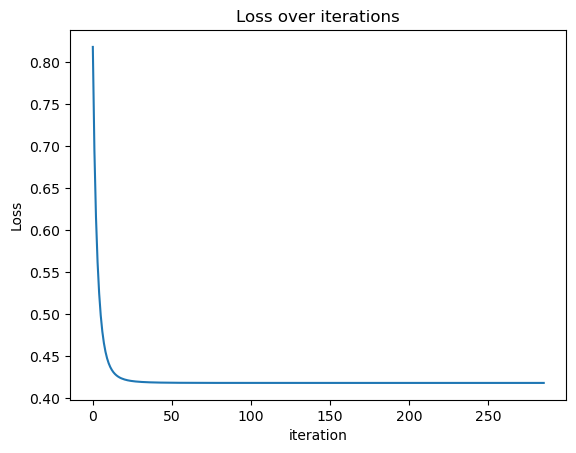

In [3]:

%matplotlib inline
np.random.seed(42)

def gradient_descent(x,y,w,lr,max_iters=100,tol=1e-6):
    losses=[loss(x,y,w)]
    weight_history=[w]
    for i in range(max_iters):
        grad=gradient(x,y,w)
        w-=lr*grad
        loss1=loss(x,y,w)
        losses.append(loss1)
        weight_history.append(w)
        if np.linalg.norm(grad)<tol:
            print(f"Converges in {i} iterations as the gradients become zero")
            break
    return np.array(weight_history),np.array(losses)

def predict(X,W,threshold=0.5):
    h_w=X@W
    predictions=sigmoid(h_w).reshape(-1,1)
    return (predictions>=threshold).astype(int)

train_data=pd.read_csv("./train-songs.csv")
X_train=train_data.drop(columns=["popular"]).to_numpy()
y_train=train_data["popular"].to_numpy().reshape(-1,1)
X_train_normalized=normalize_data(X_train)
ones=np.ones((X_train.shape[0],1))
x_train_=np.c_[X_train_normalized,ones]
w_t=np.random.rand(x_train_.shape[-1], 1)
alpha = 0.9  # Learning rate
max_iters = 1000# Maximum iterations
weights_history, cost_history = gradient_descent(x_train_, y_train,w_t, alpha, max_iters)
print(cost_history[0],cost_history[-1])
predictions=predict(x_train_,weights_history[-1])
print('Accuracy:', (predictions == y_train).mean())
print(f"Weights_final:{weights_history[-1]}")
plt.plot(cost_history)
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.title("Loss over iterations")
plt.show()

In [119]:
# data=pd.read_csv("./train-songs.csv")
# X_train_sklearn=data.drop(columns=["popular"])
# y_train_sklearn=data["popular"]
# x_train_sklearn=X_train_sklearn.to_numpy()
# y_train_sklearn=y_train_sklearn.to_numpy()
# ones=np.ones((x_train_sklearn.shape[0],1))
# x_train_sklearn_=np.c_[x_train_sklearn,ones]
# test_data=pd.read_csv("./test-songs.csv")
# X_test_sklearn=test_data.drop(columns=["popular"])
# y_test_sklearn=test_data["popular"]
# x_test_sklearn=X_test_sklearn.to_numpy()
# y_test_sklearn=y_test_sklearn.to_numpy()
# ones=np.ones((x_test_sklearn.shape[0],1))
# x_test_sklearn_=np.c_[x_test_sklearn,ones]

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,roc_curve
# model = LogisticRegression(C=1e20,max_iter=10000)
# model.fit(x_train_sklearn_, y_train_sklearn)

# probs = model.predict_proba(x_test_sklearn_)[:,1]
# thres=0.4
# preds=(probs>=thres).astype(int)
# conf_mat=confusion_matrix(y_test_sklearn,preds)
# print(f"Confusion Matrix is :{conf_mat}")
# precisi,reca,f1=precision_score(y_test_sklearn,preds),recall_score(y_test_sklearn,preds),f1_score(y_test_sklearn,preds)
# print(f"Precision:{precisi}, Recall:{reca} and the F1-Score:{f1}")
# fpr,tpr,thresholds=roc_curve(y_test_sklearn,probs)
# plt.plot(fpr, tpr, label="ROC Curve")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()


iii\. Using model predictions on __test-songs.csv__, build the confusion
matrix and subsequently calculate the precision, recall, and F1-score for a threshold of 0.4.


In [4]:
test_data=pd.read_csv("./test-songs.csv")
X_test=test_data.drop(columns=["popular"]).to_numpy()
y_test=test_data["popular"].to_numpy().reshape(-1,1)
X_test_normalized=normalize_data(X_test)
ones=np.ones((X_test.shape[0],1))
x_test_=np.c_[X_test_normalized,ones]
y_pred=predict(x_test_,weights_history[-1],0.4)
y_test=y_test.astype(int)

def metrics(y_actual,y_pred,show="yes"):
    metri={}
    accuracy=(y_pred == y_actual).mean()
    confusion_matrix=np.zeros((2,2),dtype=int)
    tp = ((y_pred == 1) & (y_actual == 1)).sum()
    fp = ((y_pred == 1) & (y_actual == 0)).sum()
    fn = ((y_pred == 0) & (y_actual == 1)).sum()
    tn = ((y_pred == 0) & (y_actual == 0)).sum()
    confusion_matrix[0,0],confusion_matrix[0,1],confusion_matrix[1,0],confusion_matrix[1,1]=tp,fn,fp,tn
    precison=tp/(tp+fp)
    recall=tp/(tp+fn)
    F1_score=2*precison*recall/(precison+recall)
    FPR=fp/(fp+tn)
    if show=="yes":
        print(f"Accuracy = {accuracy*100:.2f}%,\nConfusion Matrix[Tp,Fn,FP,TN] = {confusion_matrix},\nPrecison = {precison:.3f},\
            \nRecall[True Positive Rate] = {recall:.3f},\nF1_Score = {F1_score:.3f},\nFalse Positive rate[FPR] ={FPR:.3f} ")
    
    metri["Accuracy"],metri["Confusion_Matrix"],metri["Precision"]=accuracy,confusion_matrix,precison
    metri["Recall"],metri["F1_Score"],metri["FPR"]=recall,F1_score,FPR
    return metri

metric_dict=metrics(y_test,y_pred)

Accuracy = 79.60%,
Confusion Matrix[Tp,Fn,FP,TN] = [[890 110]
 [298 702]],
Precison = 0.749,            
Recall[True Positive Rate] = 0.890,
F1_Score = 0.814,
False Positive rate[FPR] =0.298 


iv\. Plot the ROC curve for the model and calculate the AUC metric of your model.


C:\Users\siva1\AppData\Local\Temp\ipykernel_28784\791216413.py:19: RuntimeWarning: invalid value encountered in scalar divide
  precison=tp/(tp+fp)


Area under the Curve:-0.8831324999999999


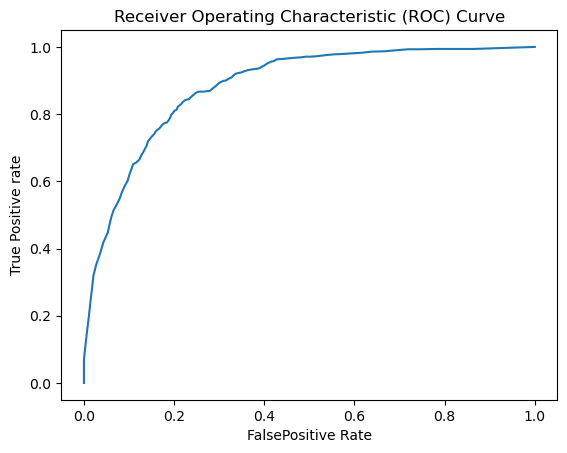

In [10]:
def roc(x_test,y_test,weights,thresholds):
    tpr_array=[]
    fpr_array=[]
    for threshold in thresholds:
        y_hat=predict(x_test,weights,threshold)
        metrics_dict=metrics(y_test,y_hat,show='no')
        tpr_array.append(metrics_dict['Recall'])
        fpr_array.append(metrics_dict["FPR"])
    return tpr_array,fpr_array

def area_under_curve(tpr,fpr):
    sorted_indices = np.argsort(fpr)
    fpr_sorted = np.array(fpr)[sorted_indices]
    tpr_sorted = np.array(tpr)[sorted_indices] 
    auc=np.trapz(tpr_sorted,fpr_sorted)
    # auc=np.trapz(tpr,fpr)
    return auc

thresholds=np.linspace(0,1,100)
tpr_array,fpr_array=roc(x_test_,y_test,weights_history[-1],thresholds)
auc=area_under_curve(tpr_array,fpr_array)
print(f"Area under the Curve:{auc}")

plt.plot(fpr_array,tpr_array)
plt.xlabel("FalsePositive Rate")
plt.ylabel("True Positive rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.show()




v\. Consider the simpler models given below.The input $\mathbf{x}$ in these models takes only 4 input features from the given dataset.

- Model A $~~~~~~~~~~~$   $\mathbf{x}$ = $[$ danceability, key, valence, tempo $]^\top$
- Model B $~~~~~~~~~~~$  $\mathbf{x}$ = $[$ danceability, loudness, acousticness, instrumentalness $]^\top$
- Model C $~~~~~~~~~~~$ $\mathbf{x}$ = $[$ key, liveness, valence, tempo $]^\top$

Train these models using your logistic regression implementation and determine the best performing model using the AUC metric.

Converges in 116 iterations as the gradients become zero
Converges in 292 iterations as the gradients become zero
Converges in 54 iterations as the gradients become zero
The weights of models are A:[[ 0.64749511]
 [ 0.04790468]
 [-0.19998377]
 [ 0.32623998]
 [-0.00767008]],
,B:[[ 0.2449692 ]
 [ 1.84132304]
 [-0.86663323]
 [-0.0463156 ]
 [-0.33797656]],
 C:[[ 0.05458218]
 [-0.0694044 ]
 [ 0.10999299]
 [ 0.24385276]
 [ 0.00027374]]


C:\Users\siva1\AppData\Local\Temp\ipykernel_28784\791216413.py:19: RuntimeWarning: invalid value encountered in scalar divide
  precison=tp/(tp+fp)
C:\Users\siva1\AppData\Local\Temp\ipykernel_28784\791216413.py:21: RuntimeWarning: invalid value encountered in scalar divide
  F1_score=2*precison*recall/(precison+recall)


Area under the Curve for model A:0.66478525
Area under the Curve for model B:0.8877568949999999
Area under the Curve for model C:0.5823182250000001


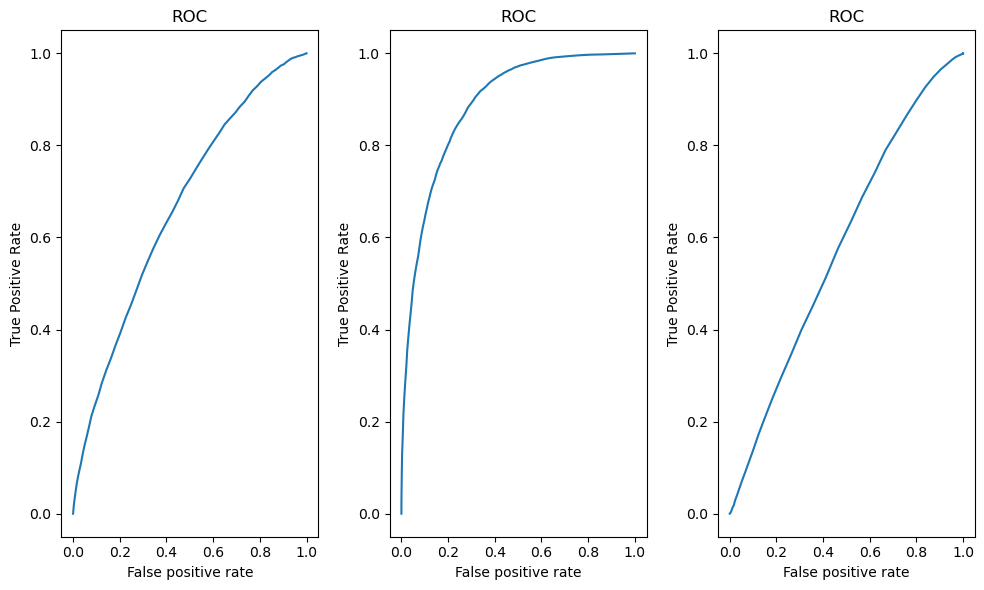

In [7]:
np.random.seed(42)
train_data_=pd.read_csv("./train-songs.csv")
X_A=train_data[["danceability","key","valence","tempo"]].to_numpy()
X_B=train_data[["danceability","loudness","acousticness","instrumentalness"]].to_numpy()
X_C=train_data[["key","liveness","valence","tempo"]].to_numpy()
X_A_normalized,X_B_normalized,X_C_normalized=normalize_data(X_A),normalize_data(X_B),normalize_data(X_C)
ones_A,ones_B,ones_C=np.ones((X_A.shape[0],1)),np.ones((X_B.shape[0],1)),np.ones((X_C.shape[0],1))
x_a_,x_b_,x_c_=np.c_[X_A_normalized,ones_A],np.c_[X_B_normalized,ones_B],np.c_[X_C_normalized,ones_C]
y_train=train_data["popular"].to_numpy().reshape(-1,1)
w_t_a=np.random.rand(x_a_.shape[-1], 1)
w_t_b=np.random.rand(x_b_.shape[-1], 1)
w_t_c=np.random.rand(x_c_.shape[-1], 1)
alpha = 0.9  # Learning rate
max_iters = 1000# Maximum iterations
weights_history_A, cost_history_A = gradient_descent(x_a_, y_train,w_t_a, alpha, max_iters)
weights_history_B, cost_history_B = gradient_descent(x_b_, y_train,w_t_b, alpha, max_iters)
weights_history_C, cost_history_C = gradient_descent(x_c_, y_train,w_t_c, alpha, max_iters)
predictions_a,predictions_b,predictions_c=predict(x_a_,weights_history_A[-1]),predict(x_b_,weights_history_B[-1]),predict(x_c_,weights_history_C)
thresholds=np.linspace(0,1,100)
print(f"The weights of models are A:{weights_history_A[-1]},\n,B:{weights_history_B[-1]},\n C:{weights_history_C[-1]}")
tpr_array_a,fpr_array_a=roc(x_a_,y_train,weights_history_A[-1],thresholds)
tpr_array_b,fpr_array_b=roc(x_b_,y_train,weights_history_B[-1],thresholds)
tpr_array_c,fpr_array_c=roc(x_c_,y_train,weights_history_C[-1],thresholds)
auc_A=area_under_curve(tpr_array_a,fpr_array_a)
print(f"Area under the Curve for model A:{auc_A}")
auc_B=area_under_curve(tpr_array_b,fpr_array_b)
print(f"Area under the Curve for model B:{auc_B}")
auc_C=area_under_curve(tpr_array_c,fpr_array_c)
print(f"Area under the Curve for model C:{auc_C}")

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,6))
ax1.plot(fpr_array_a,tpr_array_a)
ax1.set_xlabel("False positive rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("ROC")
ax2.plot(fpr_array_b,tpr_array_b)
ax2.set_xlabel("False positive rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("ROC")
ax3.plot(fpr_array_c,tpr_array_c)
ax3.set_xlabel("False positive rate")
ax3.set_ylabel("True Positive Rate")
ax3.set_title("ROC")
plt.tight_layout()
plt.show()

In [123]:
"""The Best performing Model using AUC is Model B"""

'The Best performing Model using AUC is Model B'